# Import

In [4]:
from scipy.io import loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from mapd import Trial, Table
import h5py
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Whole cell recordings

## 31H05 dim cell

### 241115_F1_C1 - 31H05-Gal4>pJFRC7

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241115_F1_C1_Table.parquet')
# T.open_notes_files()
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:300]
late_index = T.df.index[300:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
N =20
df = T.df.loc[T.df.index<200]
unique_integers = df.index.unique()
random_subset = np.random.choice(unique_integers, N, replace=False)

# Loop over the selected integers and plot something
for random in random_subset:
    df.loc[random, 'Trial'].plot_probe_groups()


## 31H05 Bright cell

### 240430_F1_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_240430_F1_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[190].plot_probe_groups(format='png')
# T.exclude_trials()
T.plot_outcomes(savefig=True)

## 81A06>pJFC7

### 241203_F2_C1 - random cell

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241203_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[190].plot_probe_groups(format='png')
# T.exclude_trials()
T.plot_outcomes(savefig=True)


In [ ]:
# # Loop over the selected integers and plot something
# for tr in range(115,130):
#     T.df.loc[tr, 'Trial'].plot_probe_groups() #(format='png')

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:300]
late_index = T.df.index[300:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
# some bubble trials:
# T.df.loc[43,"Trial"].exclude()
# T.df.loc[44,"Trial"].exclude()
# T.df.loc[154,"Trial"].exclude()
# T.df.loc[156,"Trial"].exclude()
# T.df.loc[157,"Trial"].exclude()
# T.df.loc[158,"Trial"].exclude()
# T.df.loc[56,"Trial"].exclude()

In [ ]:
N =20
unique_integers = T.df.index.unique()
random_subset = np.random.choice(unique_integers, N, replace=False)

# Loop over the selected integers and plot something
for random in random_subset:
    T.df.loc[random, 'Trial'].plot_probe_groups(format='png')


In [ ]:
plt.close()

### 241203_F3_C1 - 81A06>pJFC7

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241203_F3_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[190].plot_probe_groups(format='png')
# T.exclude_trials()
T.plot_outcomes(savefig=True)


In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

# PPK-Gal4

## 241029_F2_C1 -  ppk-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241029_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
# T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

## 241029_F3_C1 -  ppk-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241029_F3_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
# T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

## 241101_F1_C1 -  ppk-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241101_F1_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
# T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

## 241101_F2_C1 -  ppk-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241101_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
# T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

## 241105_F1_C1 -  ppk-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241105_F1_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
# T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

# Hot-Cell-Gal4

## 241105_F2_C1 -  Hot-Cell-Gal4>Chr in WT

In [ ]:
# T = Table('LEDFlashTriggerPiezoControl_241105_F2_C1_Table.parquet')
# T.open_notes_files()
# Trial(trial=246, 241121_F1_C1, dT=811.28836, ex=True) vnc was cut here
T.df.Trial[246].exclude()
T.add_df_category('cut',trial_min=247,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

## 241105_F3_C1 -  Hot-Cell-Gal4>Chr in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241105_F3_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[208].plot_probe_groups(format='png')
# T.df.Trial[208].exclude()
# [Trial(trial=208, 241105_F3_C1, dT=519.2152, ex=True)]
T.add_df_category('cut',trial_min=209,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True,cmin=-500,cmax=10)

In [ ]:
# Loop over the selected integers and plot something
for tr in range(165,178):
    T.df.loc[tr, 'Trial'].plot_probe_groups()

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Bristle stimulation

In [ ]:
# tbl_dict['LEDFlashTriggerPiezoControl_241121_F1_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
# tbl_dict['LEDFlashTriggerPiezoControl_241121_F2_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
# tbl_dict['LEDFlashTriggerPiezoControl_241122_F1_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'
# tbl_dict['LEDFlashTriggerPiezoControl_241122_F2_C1_Table.parquet'] = '38B38-Gal4>UAS-ChR in WT'

## 241121_F1_C1 - 38B38-Gal4>UAS-ChR in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241121_F1_C1_Table.parquet')
# Trial(trial=416, 241121_F1_C1, dT=811.28836, ex=True) vnc was cut here
T.add_df_category('cut',trial_min=417,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()


In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
plt.close()

## 241121_F2_C1 - 38B38-Gal4>UAS-ChR in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241121_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[364].plot_probe_groups(format='png')
# T.df.Trial[364].exclude()
# T.exclude_trials()
T.add_df_category('cut',trial_min=365,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
plt.close()

## 241122_F1_C1 - 38B38-Gal4>UAS-ChR in WT

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241122_F1_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[312].plot_probe_groups(format='png')
# T.df.Trial[312].exclude()
# T.exclude_trials()
T.add_df_category('cut',trial_min=313,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
plt.close()

## 241122_F2_C1 - 38B38-Gal4>UAS-ChR in WT

In [ ]:
# T = Table('LEDFlashTriggerPiezoControl_241122_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[364].plot_probe_groups(format='png')
# T.df.Trial[364].exclude()
# T.exclude_trials()
T.add_df_category('cut',trial_min=365,categories='_vnc_status_cat')
T.plot_outcomes(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'_vnc_status_cat':'cut'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter['_vnc_status_cat']='intact'
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo','_vnc_status_cat':'intact'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
probe_position_hm_df = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
plt.close()

# IAV KD in [w] background

These are with w;;UAS-Kir2.1

## 241205_F2_C1 - w;+;iav-gal4/uas-kir2.1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241205_F2_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[507].plot_probe_groups(format='png')
# T.exclude_trials()
T.plot_outcomes(savefig=True)


In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
# some bubble trials:
T.df.loc[156,"Trial"].plot_probe_groups()
# T.df.loc[43,"Trial"].exclude()
# T.df.loc[44,"Trial"].exclude()
# T.df.loc[154,"Trial"].exclude()
# T.df.loc[156,"Trial"].exclude()
# T.df.loc[157,"Trial"].exclude()
# T.df.loc[158,"Trial"].exclude()
# T.df.loc[56,"Trial"].exclude()

In [ ]:
plt.close()

## 241205_F3_C1 - w;+;iav-gal4/uas-kir2.1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241205_F3_C1_Table.parquet')
# T.df.Trial[364].plot_probe_groups(format='png')
# T.df.Trial[364].exclude()
# T.exclude_trials()
# T.add_df_category('cut',trial_min=365,categories='_vnc_status_cat')

In [ ]:
T.open_notes_files()


In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
T.compute_trial_method(method_name='probe_positive_effort')
T.plot_trial_computations(method_name='probe_positive_effort')

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_vnc_status_cat':'intact'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=None,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Early
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=early_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

# Late
df_filter = {'pyasState':'hi'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

df_filter = {'pyasState':'lo'}
T.plot_probe_distribution(filter=df_filter,index=late_index,bin_min=-500,bin_max=10,savefig=True)
plt.close()

In [ ]:
N =20
df = T.df.loc[T.df.index<200]
unique_integers = df.index.unique()
random_subset = np.random.choice(unique_integers, N, replace=False)

# Loop over the selected integers and plot something
for random in random_subset:
    df.loc[random, 'Trial'].plot_probe_groups(format='png')

In [ ]:
tr = T.df.loc[45,'Trial']
dir(tr)

In [ ]:
tr.groups

In [ ]:
plt.close()

## 241219_F1_C1 - w;+;iav-gal4/uas-kir2.1

Blue then Green. 


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241219_F1_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=624,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=625,trial_max=800,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=801,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

In [ ]:
T.plot_some_probe_groups(index=T.df.loc[267:269].index,savefig=False)

In [ ]:
tr_0 = 210

for tr_i in range(tr_0,tr_0+50,5):
    T.plot_some_probe_groups(index=T.df.loc[tr_i:tr_i+5].index,savefig=False)

In [ ]:
T.plot_some_probe_groups(index=T.df.loc[495:499].index,savefig=False)

In [ ]:
plt.close()

## 241219_F2_C1 - w;+;iav-gal4/uas-kir2.1

Blue then Green. 


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241219_F2_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=520,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=521,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

## 241220_F1_C1 - w;+;iav-gal4/uas-kir2.1

Green then Blue then Green. 


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241220_F1_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,trial_max=104,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=105,trial_max=566,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=567,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

## 241220_F2_C1 - w;+;iav-gal4/uas-kir2.1

Blue then Green. 


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_241220_F2_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,trial_max=104,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=105,trial_max=572,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=573,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

# IAV KD in [+] background

## Blue

### 250317_F1_C1 - +;+;iav-gal4/uas-kir2.1

Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250317_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250317_F2_C1 - +;+;iav-gal4/uas-kir2.1

Blue.


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250317_F2_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('blue',trial_min=105,trial_max=572,categories='_filtercube_status_cat')
# T.add_df_category('blue',trial_min=573,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250318_F1_C1 - +;+;iav-gal4/uas-kir2.1

Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250318_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250318_F2_C1 - +;+;iav-gal4/uas-kir2.1

Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250318_F2_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250318_F3_C1 - +;+;iav-gal4/uas-kir2.1

Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250318_F3_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250423_F1_C1 - +;+;iav-gal4/uas-kir2.1

Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250423_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

## Green (4)

### 250320_F1_C1 - +;+;iav-gal4/uas-kir2.1

Green


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250320_F1_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250320_F2_C1 - +;+;iav-gal4/uas-kir2.1

Green


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250320_F2_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250325_F1_C1 - +;+;iav-gal4/uas-kir2.1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250325_F1_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250423_F2_C1 - +;+;iav-gal4/uas-kir2.1

Green


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250423_F2_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
tr = T.df.loc[442,'Trial']
tr.plot_probe_groups()

target_min = tr.params['pyasXPosition']
target_max = tr.params['pyasXPosition'] + tr.params['pyasWidth']
print(target_max)

probe_position = tr.probe_position[tr.time>0].ravel()
all(probe_position<target_min)

# 30g06-Gal4>Kir2.1 (Green)

### 250423_F3_C1 - +;+;30g06-Gal4/uas-kir2.1

Green


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250423_F3_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250423_F2_C1 - +;+;iav-gal4/uas-kir2.1

In [ ]:
### 250423_F2_C1 - +;+;iav-gal4/uas-kir2.1

# +;+;iav-Gal4/pJFRC7

## Blue

### 250515_F1_C1

T = pd.read_parquet("D:\\Data\\250515\\250515_F1_C1\\LEDFlashTriggerPiezoControl_250515_F1_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/852 [00:00<?, ?it/s]

posx and posy should be finite values
posx and posy should be finite values


Excluding trials:
[]
8
64 of 64 timeouts (100.0%) during blue light


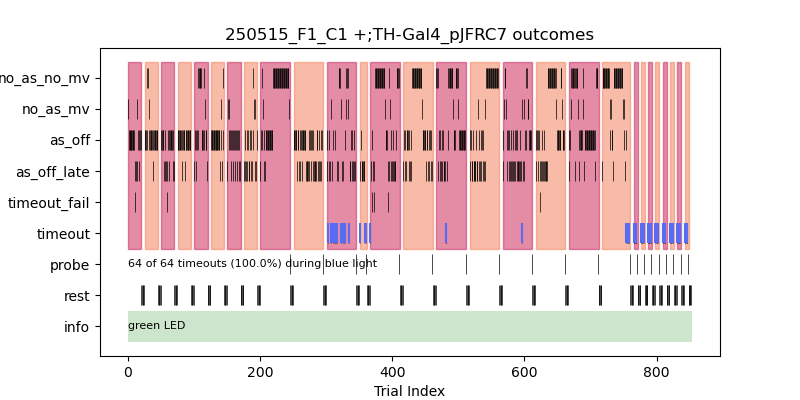

excluding: Trial(trial=55, 250515_F1_C1, dT=8.7462, ex=False)
self.excluded: [[1]]
Reason for excluding is: probe values too high
Excluded for Exclusion: probe values too high: Trial(trial=55, 250515_F1_C1, dT=8.7462, ex=True)
excluding: Trial(trial=754, 250515_F1_C1, dT=15.95442, ex=False)
self.excluded: [[1]]
Reason for excluding is: probe values too high
Excluded for Exclusion: probe values too high: Trial(trial=754, 250515_F1_C1, dT=15.95442, ex=True)
excluding: Trial(trial=755, 250515_F1_C1, dT=17.69182, ex=False)
self.excluded: [[1]]
Reason for excluding is: probe values too high
Excluded for Exclusion: probe values too high: Trial(trial=755, 250515_F1_C1, dT=17.69182, ex=True)
Reason for excluding is: probe values too high
Excluded for Exclusion: probe values too high: Trial(trial=756, 250515_F1_C1, dT=15.90698, ex=True)
excluding: Trial(trial=759, 250515_F1_C1, dT=10.01188, ex=False)
self.excluded: [[1]]
Reason for excluding is: probe values too high
Excluded for Exclusion: pro

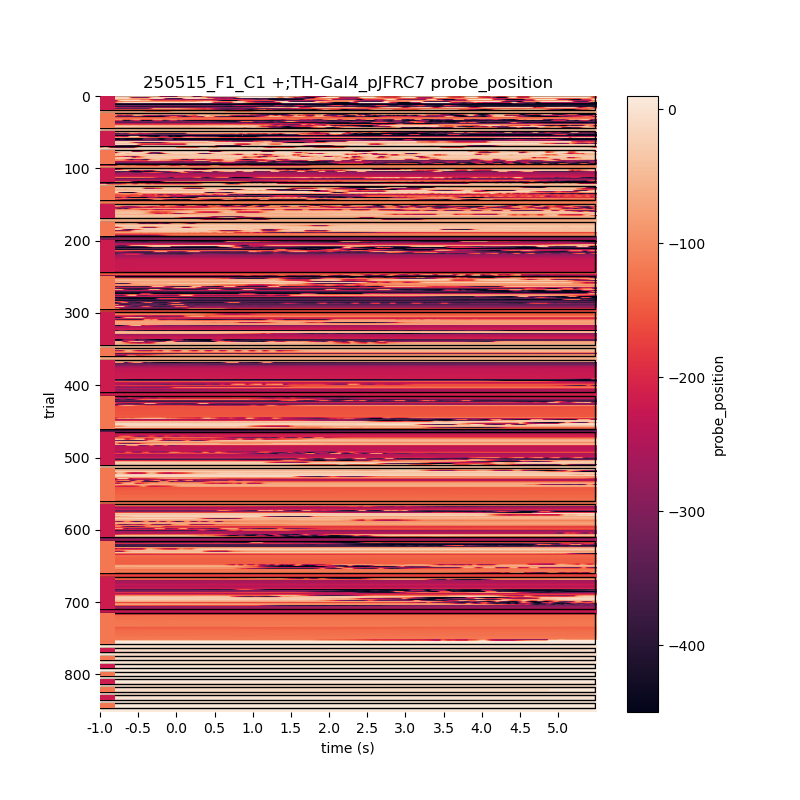

In [16]:
id = '250515_F1_C1'

T = Table('LEDFlashTriggerPiezoControl_{}_Table.parquet'.format(id))
# T.open_notes_files()
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

# TH-Gal4>GFP (using WT white allele)

### 250325_F2_C1

# TH-Gal4>Kir2.1

## Blue

### 250506_F1_C1

## Green

### 250506_F2_C1

### 250507_F1_C1

T = pd.read_parquet("D:\\Data\\250507\\250507_F1_C1\\LEDFlashTriggerPiezoControl_250507_F1_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/699 [00:00<?, ?it/s]

posx and posy should be finite values
posx and posy should be finite values


Excluding trials:
[]
8
1 of 1 timeouts (100.0%) during blue light


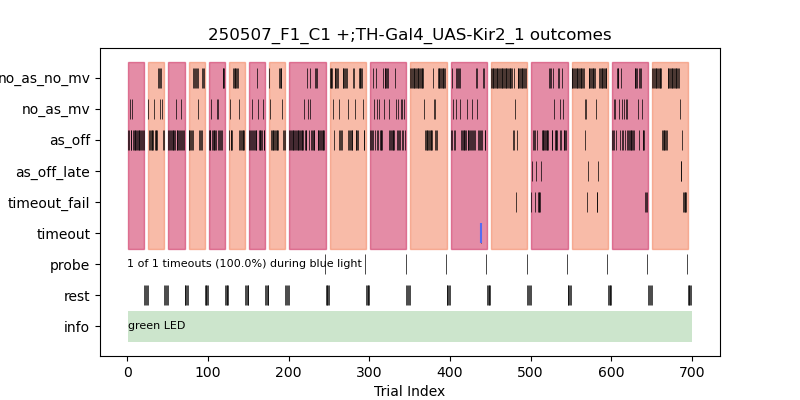

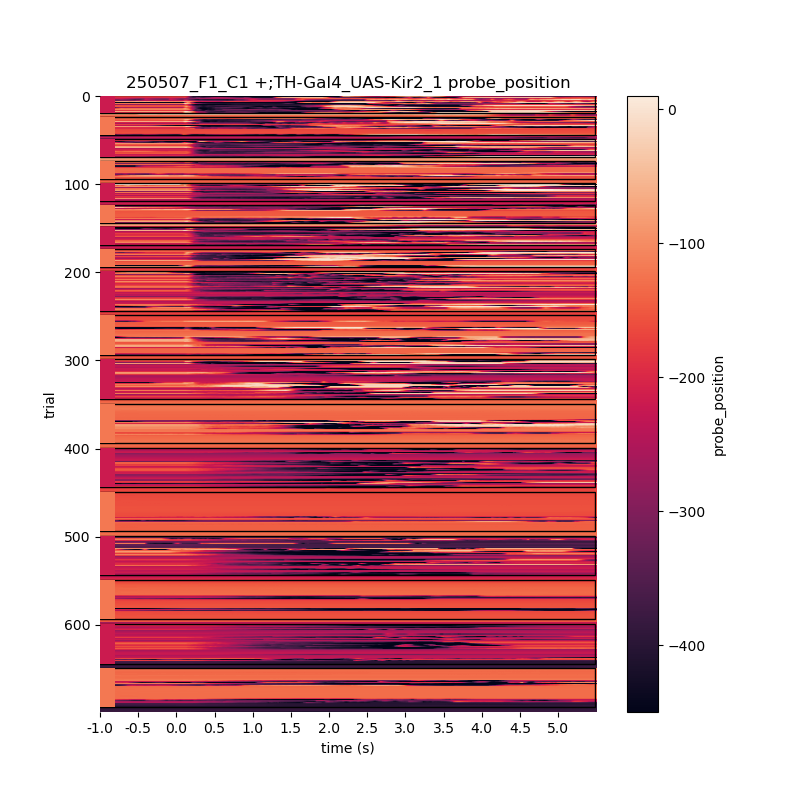

In [17]:
T = Table('LEDFlashTriggerPiezoControl_250507_F1_C1_Table.parquet')
# T.open_notes_files()
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250507_F2_C1

In [5]:
T = Table('LEDFlashTriggerPiezoControl_250507_F2_C1_Table.parquet')
# T.open_notes_files()


T = pd.read_parquet("D:\\Data\\250507\\250507_F2_C1\\LEDFlashTriggerPiezoControl_250507_F2_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/460 [00:00<?, ?it/s]

Excluding trials:
[]


In [6]:
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460],
      dtype='int64', name='trial_number', length=460)

posx and posy should be finite values
posx and posy should be finite values


8
0 timeouts


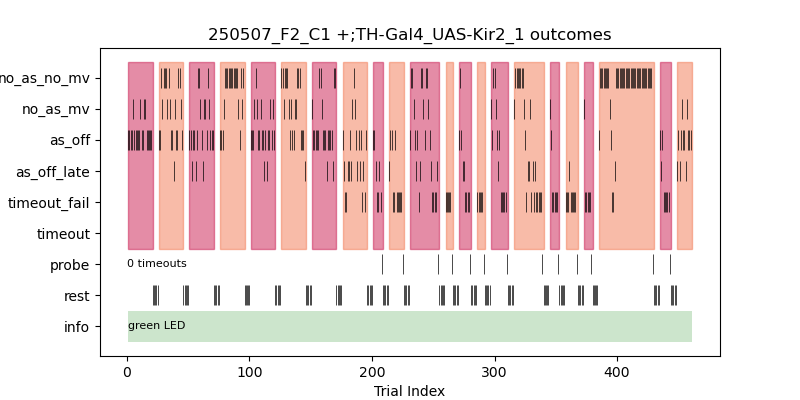

In [7]:
T.plot_outcomes(savefig=True)

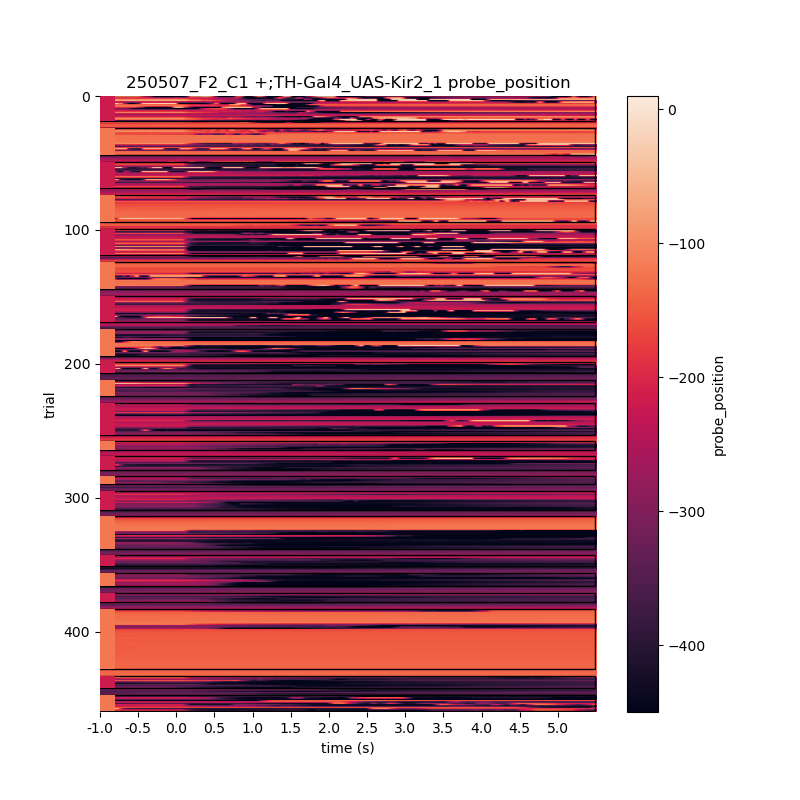

In [8]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250509_F1_C1

T = pd.read_parquet("D:\\Data\\250509\\250509_F1_C1\\LEDFlashTriggerPiezoControl_250509_F1_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/396 [00:00<?, ?it/s]

posx and posy should be finite values
posx and posy should be finite values


Excluding trials:
[]
8
42 of 42 timeouts (100.0%) during blue light


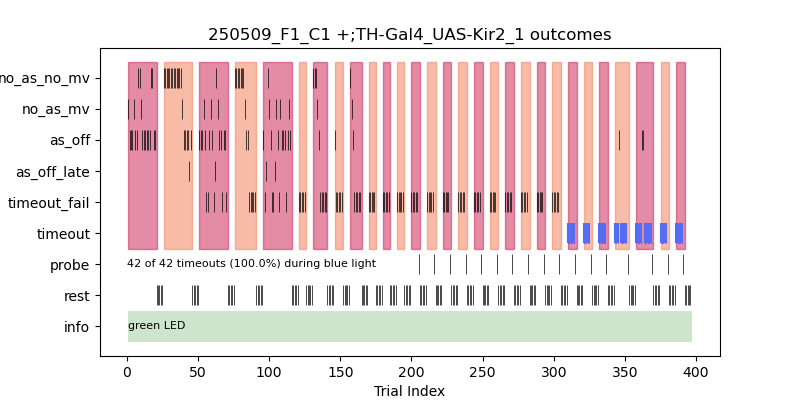

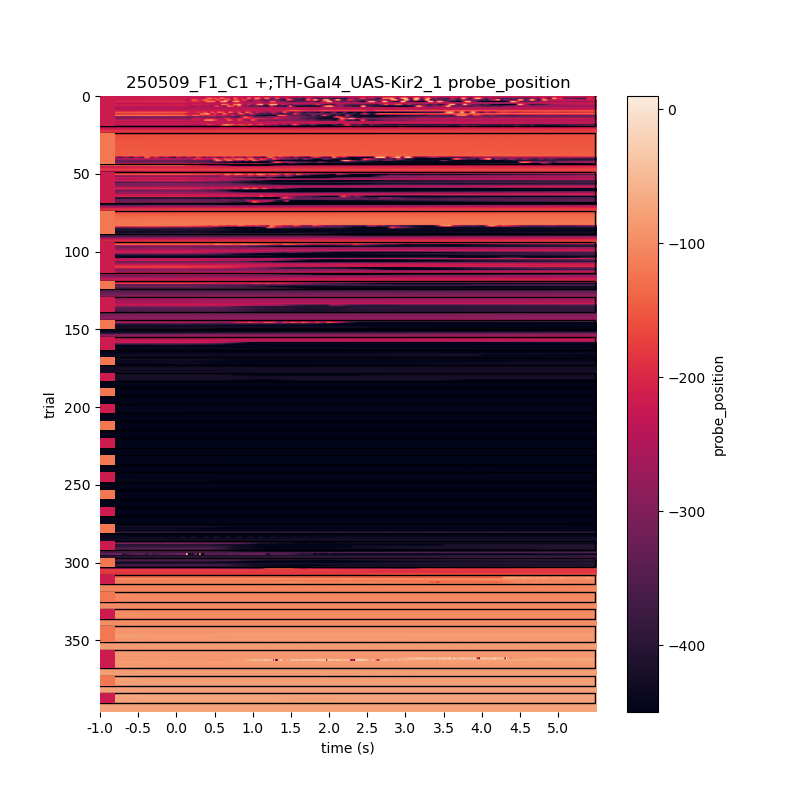

In [14]:
id = '250509_F1_C1'

T = Table('LEDFlashTriggerPiezoControl_{}_Table.parquet'.format(id))
# T.open_notes_files()
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250509_F2_C1

T = pd.read_parquet("D:\\Data\\250509\\250509_F2_C1\\LEDFlashTriggerPiezoControl_250509_F2_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/887 [00:00<?, ?it/s]

posx and posy should be finite values
posx and posy should be finite values


Excluding trials:
[]
8
79 of 79 timeouts (100.0%) during blue light


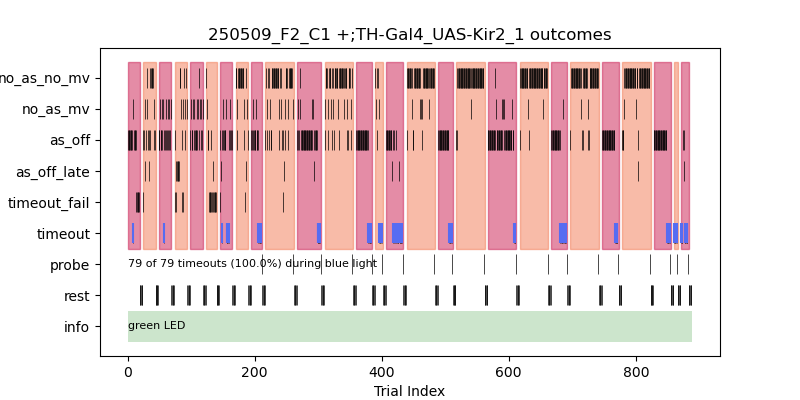

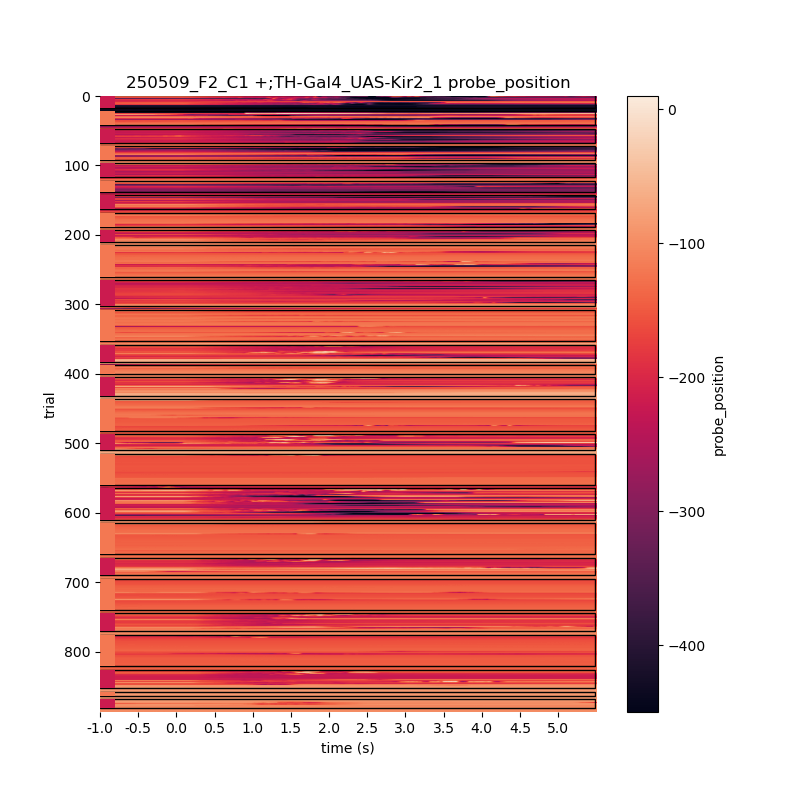

In [15]:
id = '250509_F2_C1'

T = Table('LEDFlashTriggerPiezoControl_{}_Table.parquet'.format(id))
# T.open_notes_files()
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

### 250514_F1_C1 Training

T = pd.read_parquet("D:\\Data\\250514\\250514_F1_C1\\LEDFlashTriggerPiezoControl_250514_F1_C1_Table.parquet")
Getting trials


Pandas Apply:   0%|          | 0/720 [00:00<?, ?it/s]

posx and posy should be finite values


Excluding trials:
[]
8
16 of 16 timeouts (100.0%) during blue light


posx and posy should be finite values


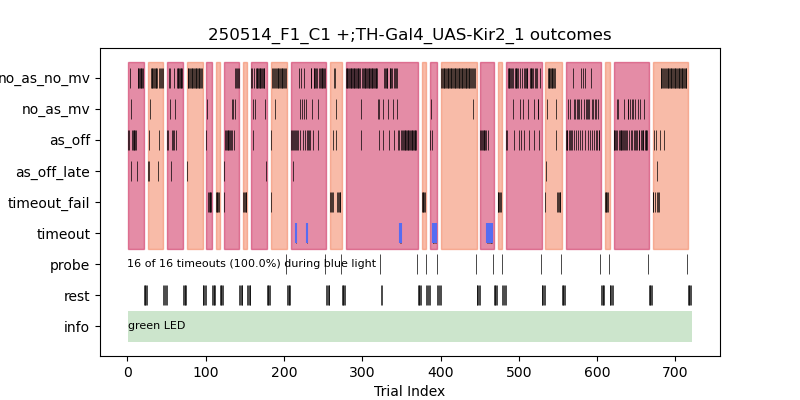

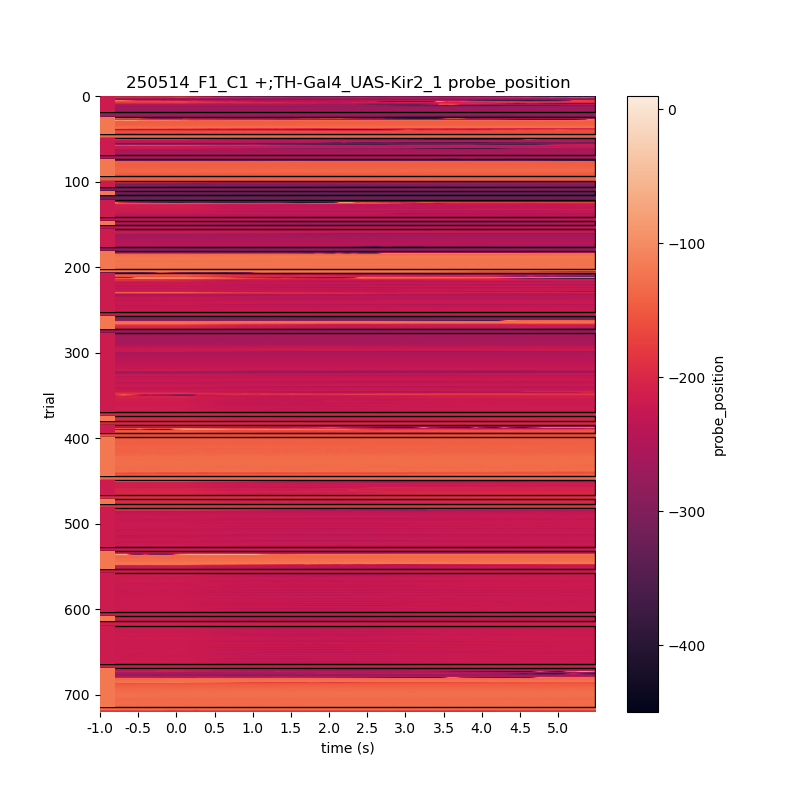

In [ ]:
id = '250514_F1_C1'

# Note, tried training the fly initially.

T = Table('LEDFlashTriggerPiezoControl_250514_F1_C1_Table.parquet')
# T.open_notes_files()
T.add_df_category('green',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

# Behavior with drivers (WT or w)

## Green to Blue LED behavior

### 250127_F1_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250127_F1_C1_Table.parquet')
# T.open_notes_files()
# T.df.Trial[507].plot_probe_groups(format='png')
# T.exclude_trials()
T.add_df_category('green',trial_min=4,trial_max=416,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=417,categories='_filtercube_status_cat')
T.plot_outcomes(savefig=True)

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
# early_index = T.df.index[0:100]
# late_index = T.df.index[100:]

# T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
# plt.close()

df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
                  {'pyasState':'lo','_filtercube_status_cat':'green'},
                  {'pyasState':'hi','_filtercube_status_cat':'blue'},
                  {'pyasState':'lo','_filtercube_status_cat':'blue'}]

for flt in df_filter_list:
    T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)

# plt.close()

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=-10)

In [ ]:
plt.close()

### 250127_F2_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250127_F2_C1_Table.parquet')
T.add_df_category('green',trial_min=1,trial_max=415,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=417,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# T.plot_probe_distribution(filter=None,index=None,bin_min=-500,bin_max=10,savefig=True)
# plt.close()

df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
                  {'pyasState':'lo','_filtercube_status_cat':'green'},
                  {'pyasState':'hi','_filtercube_status_cat':'blue'},
                  {'pyasState':'lo','_filtercube_status_cat':'blue'}]

for flt in df_filter_list:
    T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)

# plt.close()


In [ ]:
index = T.df.index[0:400]
hmdf = T.plot_probe_position_heatmap(index = index,format='svg',cmin=-450, cmax=-10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=False)
T.df.loc[170, 'Trial'].plot_probe_groups(from_zero=True,use_full_y=False,format='svg')

In [ ]:

plt.close()

### 250128_F1_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250128_F1_C1_Table.parquet')
T.add_df_category('green',trial_min=2,trial_max=582,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=583,categories='_filtercube_status_cat')

# lst = 
# # T.exclude_list_of_trials(list=lst, reason='Tracking fails')
# # T.exclude_list_of_trials(list=lst, reason='Ran out of solution')

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()

T.plot_outcomes(savefig=True)


In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=-10)
# plt.close()
# plt.close()

In [ ]:
T.plot_some_trials(index=T.df.loc[3:8].index)

In [ ]:
T.open_notes_files()

In [ ]:
poor_tracking = T.df.loc[54:89]
poor_tracking.index
T.exclude_list_of_trials(poor_tracking.index,'poor_tracking')

In [ ]:
solution_ran_out = T.df.loc[350:374]
solution_ran_out.index
T.exclude_list_of_trials(solution_ran_out.index,'solution_ran_out')

### 250204_F1_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250204_F1_C1_Table.parquet')
T.add_df_category('green',trial_min=1,trial_max=576,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=577,categories='_filtercube_status_cat')

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()

T.plot_outcomes(savefig=True)
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)
# T.plot_some_trials(index=T.df.loc[320:327].index,savefig=True)

### 250204_F2_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250204_F2_C1_Table.parquet')
T.add_df_category('green',trial_min=1,trial_max=408,categories='_filtercube_status_cat')
T.add_df_category('blue',trial_min=409,categories='_filtercube_status_cat')

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()

T.plot_outcomes(savefig=True)


In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
T.plot_some_trials(index=T.df.loc[320:327].index,savefig=True)

In [ ]:
plt.close()

## Blue to Green 

### 250211_F2_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250211_F2_C1_Table.parquet')
T.add_df_category('blue',trial_min=1,trial_max=354,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=355,categories='_filtercube_status_cat')

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()


In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
T.plot_some_trials(index=T.df.loc[127:135].index,savefig=True)


In [ ]:
T.df.loc[128].Trial.plot_probe_groups()

In [ ]:
T.df.loc[T.df['controlToggle']==0].shape

### 250211_F3_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250211_F3_C1_Table.parquet')
T.add_df_category('blue',trial_min=1,trial_max=489,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=490,categories='_filtercube_status_cat')

df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
early_index = T.df.index[0:100]
late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()



In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)
# T.plot_some_trials(index=T.df.loc[320:327].index,savefig=True)

In [ ]:
T.plot_some_trials(index=T.df.loc[90:327].index,savefig=True)

## W+ Blue to Green

### ex_250226_F1_C1

Not including this cell. Pretty good learning, if I want to analyze, and some interesting movements to come back to, but the glue came off and the fly adopted an alternative strategy after that for a bit.

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250226_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.add_df_category('blue',trial_min=1,trial_max=354,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=355,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
T.df.Trial[120].plot_probe_groups(savefig=True)

In [ ]:

# df_filter = {'pyasState':'hi','_filtercube_status_cat':'green'}
# early_index = T.df.index[0:100]
# late_index = T.df.index[100:]

# df_filter_list = [{'pyasState':'hi','_filtercube_status_cat':'green'},
#                   {'pyasState':'lo','_filtercube_status_cat':'green'},
#                   {'pyasState':'hi','_filtercube_status_cat':'blue'},
#                   {'pyasState':'lo','_filtercube_status_cat':'blue'}]

# for flt in df_filter_list:
#     T.plot_probe_distribution(filter=flt,index=None,bin_min=-500,bin_max=10,savefig=True)
#     plt.close()

### 250226_F2_C1

Nice fly_cell. There was the strange anticipation of the target change. There was a very long rest before switching to green LED. But even then 

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250226_F2_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=691,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=692,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
T.df.Trial[691].plot_probe_groups(savefig=True)

### 250227_F1_C1

Blue then Green. Really Nice! timeouts only begin with the green LED

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250227_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=510,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=511,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

In [ ]:
plt.close()

### 250227_F2_C1

Blue then Green. 
Nice learning! Some more timeouts and more as off trials with Green.

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250227_F2_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=510,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=511,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250227_F3_C1

?

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250227_F3_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=638,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250228_F1_C1

Blue then Green. 
This one takes a long time to learn in each block. Some more timeouts and more as off trials with Green.

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250228_F1_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=507,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250304_F3_C1

Blue then Green. 


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250304_F3_C1_Table.parquet')
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,trial_max=1450,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=True)

### 250425_F1_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250425_F1_C1_Table.parquet')
# T.open_notes_files()

In [ ]:
T.df

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('blue',trial_min=1,categories='_filtercube_status_cat')
# T.add_df_category('green',trial_min=508,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
tr = T.df.loc[104,'Trial']
tr.plot_group('current_2')

In [ ]:
tr.params

## w+ Green to Blue

### 250228_F2_C1

Green then Blue


In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250228_F2_C1_Table.parquet')

In [ ]:
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=51,trial_max=713,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
index = T.df.index[50:450]
hmdf = T.plot_probe_position_heatmap(index = index,format='svg',cmin=-450, cmax=-10)
# hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=False)
T.df.loc[328, 'Trial'].plot_probe_groups(from_zero=True,use_full_y=False,format='svg')

### 250304_F2_C1

In [ ]:
T = Table('LEDFlashTriggerPiezoControl_250304_F2_C1_Table.parquet')

In [ ]:
T.open_notes_files()

In [ ]:
# T.exclude_list_of_trials(T.df.loc[83:86].index,reason='probe slipped, can kick')

In [ ]:
T.add_df_category('green',trial_min=1,trial_max=408,categories='_filtercube_status_cat')
T.add_df_category('green',trial_min=409,trial_max=513,categories='_filtercube_status_cat')

In [ ]:
T.plot_outcomes(savefig=True)

In [ ]:
hmdf = T.plot_probe_position_heatmap(savefig=True,cmin=-450, cmax=10)

DEBUG = True

In [ ]:
# T.plot_some_trials(index=T.df.loc[83:85].index,savefig=True)
# T.loc[83:85]
# T._excluded_df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=False)
T.df.loc[84, 'Trial'].plot_probe_groups(use_full_y = True,savefig=False)


# Play with table